In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn; assert sklearn.__version__ >= "0.20"

In [2]:
fichero = "C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos\\winequality-red.csv"
datos = pd.read_csv(fichero)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

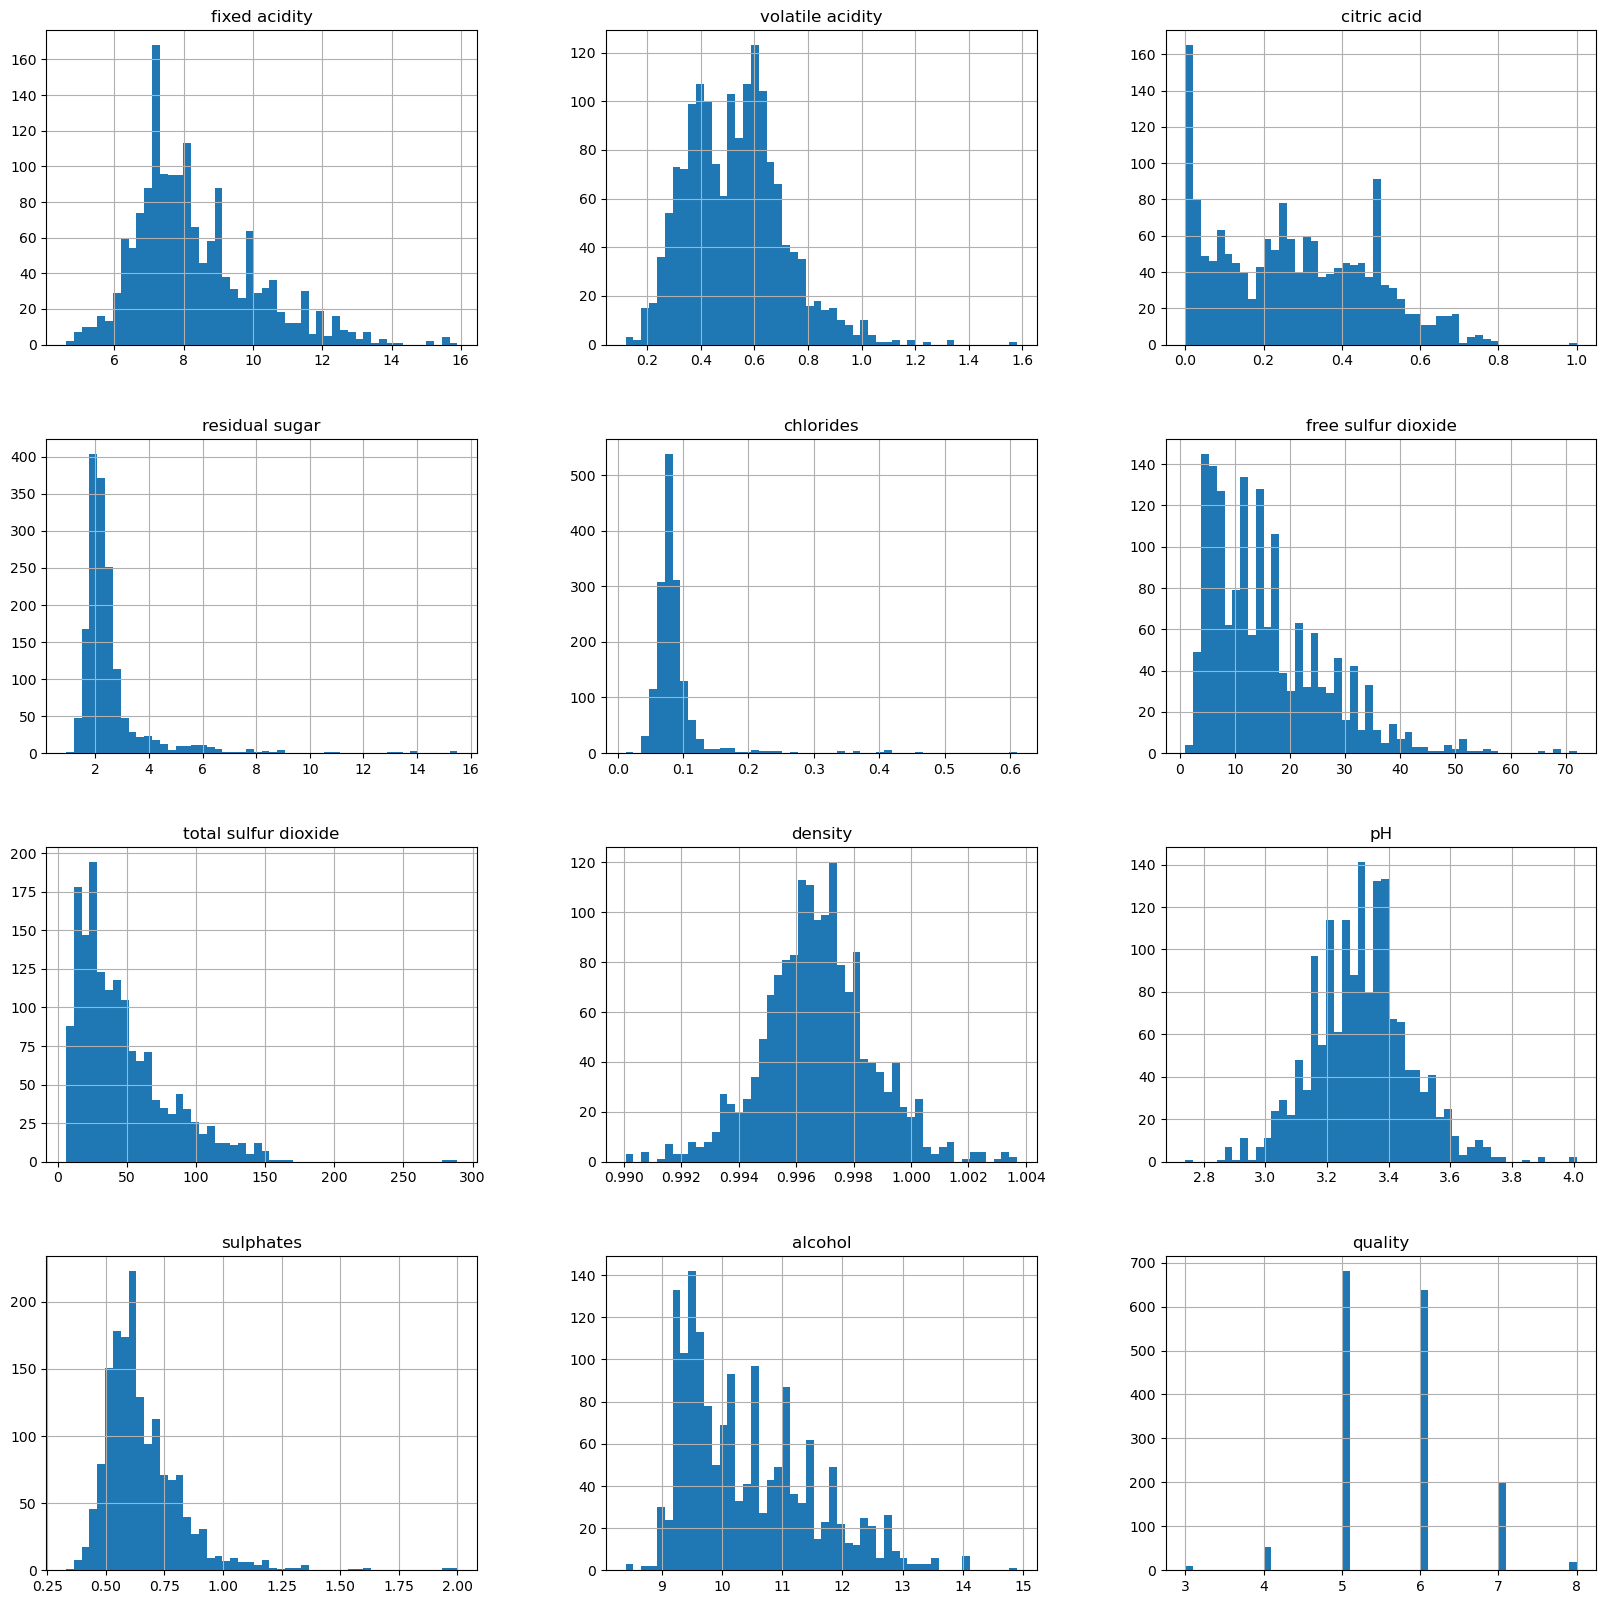

In [3]:
datos.hist(bins=50, figsize=(20, 20))

### Creación de sis 
Si la calidad es mayor a 5 es buen vino

In [10]:
X, y = datos.drop('quality', axis=1), datos['quality']

In [11]:
X_train, X_test, y_train, y_test = X[:750], X[750:], y[:750], y[750:]

In [14]:
y_train_quality = (y_train == 5)
y_test_quality = (y_test == 5)

y_train_quality

0       True
1       True
2       True
3      False
4       True
       ...  
745    False
746    False
747     True
748    False
749    False
Name: quality, Length: 750, dtype: bool

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train_quality)

SGDClassifier()

In [25]:
ejemplo = X.iloc[85]
sgd_clf.predict([ejemplo])

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_quality, cv=3, scoring="accuracy")

array([0.508, 0.584, 0.628])

## Matriz de confusión

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_quality, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_quality,y_train_pred)

array([[234, 148],
       [181, 187]], dtype=int64)

- 234 verdaderos negativos
- 187 verdaderos negativos

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
score_precision = precision_score(y_train_quality,y_train_pred)
score_recall = recall_score(y_train_quality,y_train_pred)
score_f1 = f1_score(y_train_quality, y_train_pred)

print(f"- Precision score = {score_precision}\n- Recall score = {score_recall}\n- F1 score = {score_f1}")

- Precision score = 0.5582089552238806
- Recall score = 0.5081521739130435
- F1 score = 0.5320056899004267


In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_quality, cv=3, method="decision_function")
threshold = 300
y_pred_new = (y_scores > threshold)
nueva_precision = precision_score(y_train_quality, y_pred_new)
nuevo_recall = recall_score(y_train_quality, y_pred_new)
print(f"- Nueva Precision = {nueva_precision}\n- Nuevo Recall = {nuevo_recall}")

- Nueva Precision = 0.6303797468354431
- Nuevo Recall = 0.6766304347826086


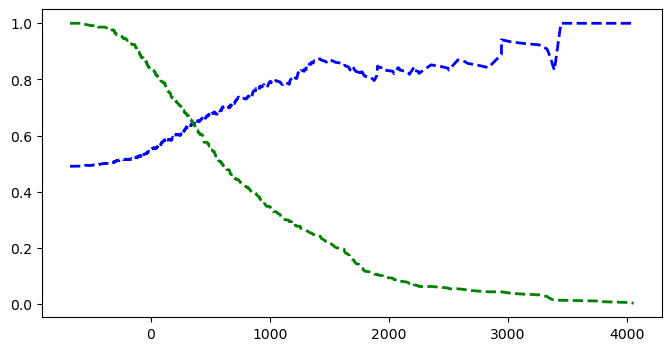

In [39]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_quality, y_scores)
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

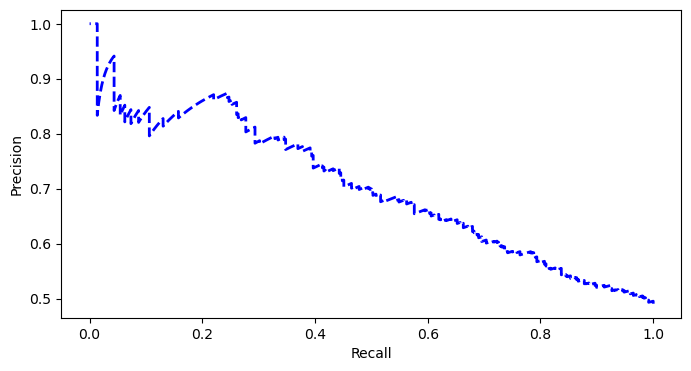

In [40]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

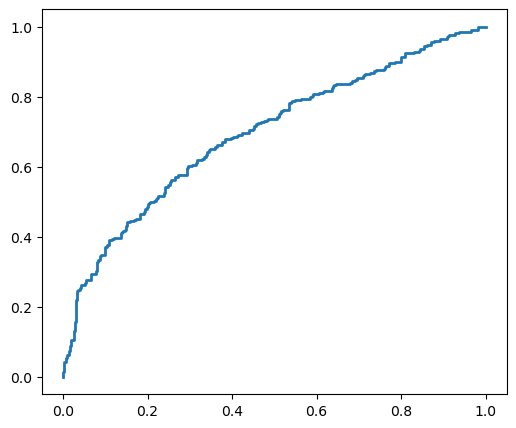

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_quality, y_scores)
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_quality, y_scores)

0.6962426018666059

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_quality, cv=3,
                                    method="predict_proba")
y_probas_forest[:4]

array([[0.25, 0.75],
       [0.27, 0.73],
       [0.31, 0.69],
       [0.5 , 0.5 ]])

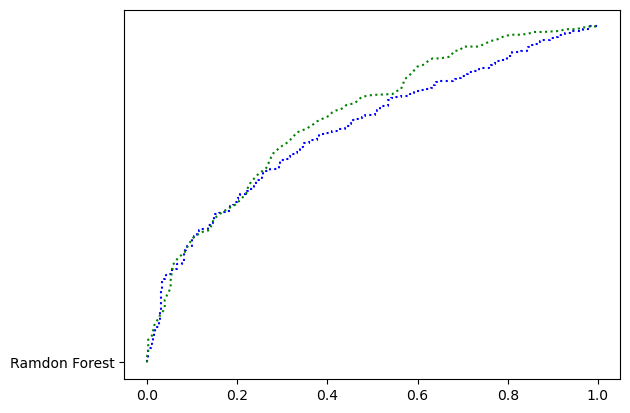

In [44]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_quality, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "g:", "Ramdon Forest")

In [45]:
y_train_forest = cross_val_predict(forest_clf, X_train, y_train_quality, cv=3)
roc_score = roc_auc_score(y_train_quality, y_scores_forest)
score_precision_roc = precision_score(y_train_quality, y_train_forest)
score_recall_roc = recall_score(y_train_quality, y_train_forest)
print(f"Roc score = {roc_score}")
print(f"Precision score roc = {score_precision_roc}")
print(f"Recall score roc = {score_recall_roc}")

Roc score = 0.7320452993398587
Precision score roc = 0.6711590296495957
Recall score roc = 0.6766304347826086
